## Churchland Widefield Data

This notebook demonstrates:
- Plot TCA latents and PCA latent trajectory for left vs right

This is done in the representative mSM30 mouse, for the 10-Oct-2017 session. This is a sanity check, performed on the period around the presentation of the spout

In [1]:
import numpy as np
import pandas as pd
import ssm
import seaborn as sns
import numpy.random as npr
import matplotlib.pyplot as plt
import numpy.linalg as la
import tensortools as tt
from collections import OrderedDict
from matplotlib.font_manager import FontProperties
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import loadmat
from sklearn.decomposition import PCA
from ssm import LDS
from Session import *
from LVM import *

sns.set_style("white")
sns.set_context("talk")

## Load Session and run Tensor Component Analysis

In [2]:
session = Session("vistrained", "mSM30", "10-Oct-2017")
levergrab_activity = session.get_lever_grab_activity()

In [3]:
def fit_model(Xn):
    Ks = [i for i in range(1,20,1)]       
    ensembles = tt.Ensemble(fit_method='cp_als', fit_options=dict(tol=1e-4))
    print(Ks)
    ensembles.fit(Xn, ranks=Ks, replicates=3)    
    return ensembles

In [4]:
ensembles = fit_model(levergrab_activity.T)

Fitting rank-1 models:   0%|          | 0/3 [00:00<?, ?it/s]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


Rank-1 models:  min obj, 0.96;  max obj, 0.96;  time to fit, 1.4s


Rank-2 models:  min obj, 0.93;  max obj, 0.93;  time to fit, 2.4s


Rank-3 models:  min obj, 0.91;  max obj, 0.91;  time to fit, 3.7s


Rank-4 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 3.8s


Rank-5 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 6.1s


Rank-6 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 6.4s


Rank-7 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 7.0s


Rank-8 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 5.5s


Rank-9 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 6.3s


Rank-10 models:  min obj, 0.82;  max obj, 0.82;  time to fit, 6.7s


Rank-11 models:  min obj, 0.81;  max obj, 0.82;  time to fit, 10.2s


Rank-12 models:  min obj, 0.80;  max obj, 0.81;  time to fit, 9.4s


Rank-13 models:  min obj, 0.79;  max obj, 0.80;  time to fit, 9.2s


Rank-14 models:  min obj, 0.79;  max obj, 0.79;  time to fit, 10.3s


Rank-15 models:  min obj, 0.78;  max obj, 0.78;  time to fit, 8.2s


Rank-16 models:  min obj, 0.77;  max obj, 0.77;  time to fit, 9.4s


Rank-17 models:  min obj, 0.77;  max obj, 0.77;  time to fit, 9.7s


Rank-18 models:  min obj, 0.76;  max obj, 0.76;  time to fit, 9.5s


Rank-19 models:  min obj, 0.75;  max obj, 0.75;  time to fit, 11.2s


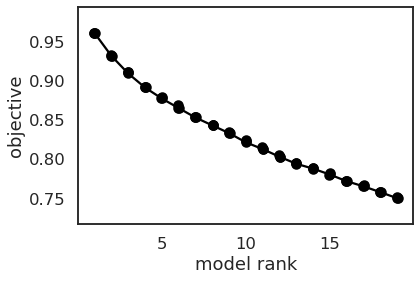

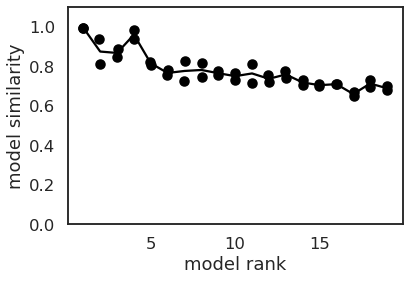

In [6]:
line_kw = {
  'color': 'black',
  'label': 'cp_als',
}
scatter_kw = {
  'color': 'black',
}

plt.figure()
tt.plot_objective(ensembles, line_kw=line_kw, scatter_kw=scatter_kw)
plt.show()

plt.figure()
tt.plot_similarity(ensembles, line_kw=line_kw, scatter_kw=scatter_kw)

# Plot Trial Factors during lever hold

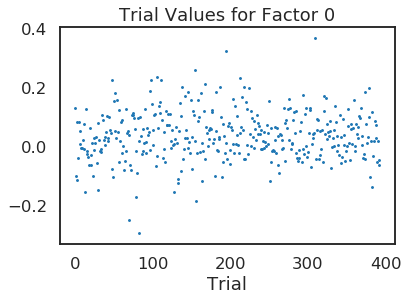

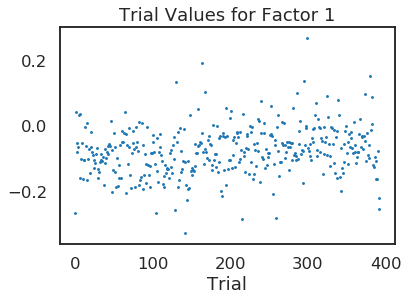

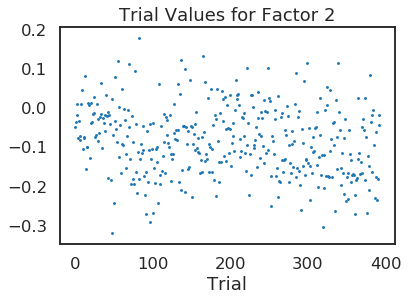

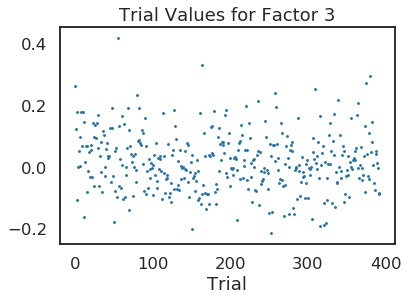

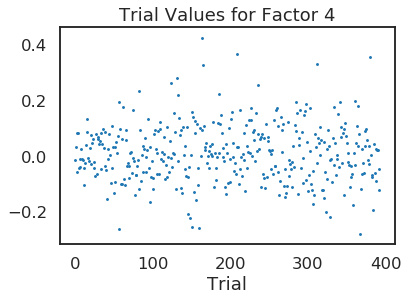

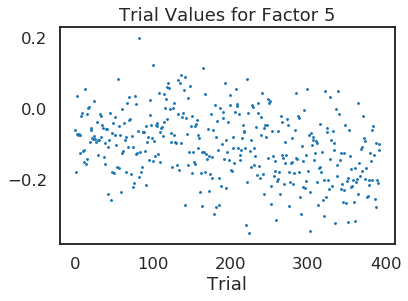

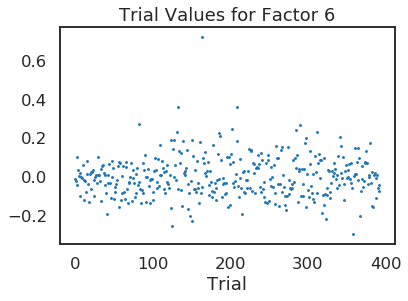

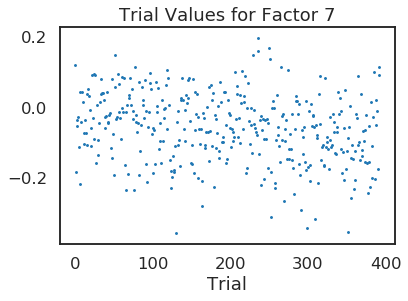

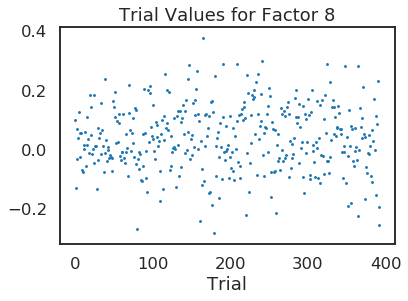

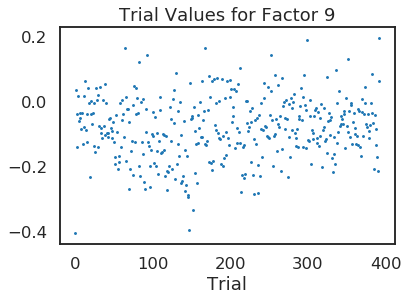

In [32]:
# Plot 10 Factors
rank = 10
models = ensembles.factors(rank=rank)
model = models[0]
factors = model.factors

for i in range(rank):
    trial_factor = factors[2][:,i]
    plt.figure()
    plt.scatter(
        np.arange(trial_factor.size), trial_factor,
        s = 2, label = "Factor %d"%i
        )
    plt.xlabel("Trial")
    plt.title("Trial Values for Factor %d"%i)
    plt.show()

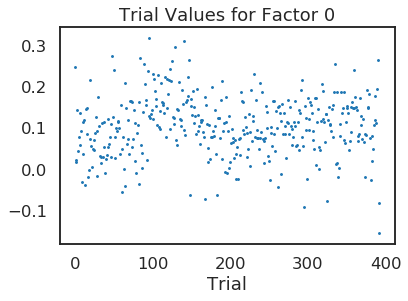

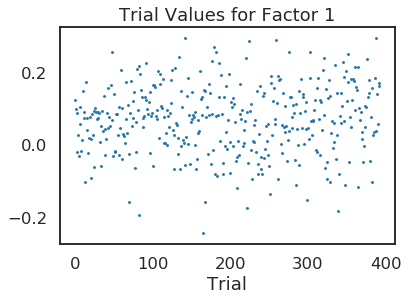

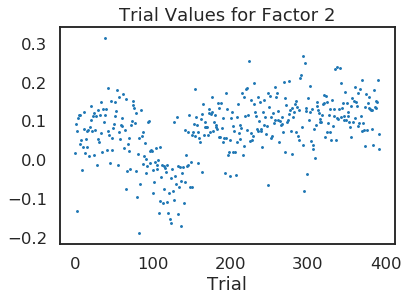

In [40]:
# Plot 3 Factors
rank = 3
models = ensembles.factors(rank=rank)
model = models[0]
factors = model.factors

for i in range(rank):
    trial_factor = factors[2][:,i]
    plt.figure()
    plt.scatter(
        np.arange(trial_factor.size), trial_factor,
        s = 2, label = "Factor %d"%i
        )
    plt.xlabel("Trial")
    plt.title("Trial Values for Factor %d"%i)
    plt.show()

## Plot TCA temporal factors during the lever hold

We'll look at the trajectory along the first three temporal factors

In [34]:
rank = 3
models = ensembles.factors(rank=rank)
model = models[0]
factors = model.factors

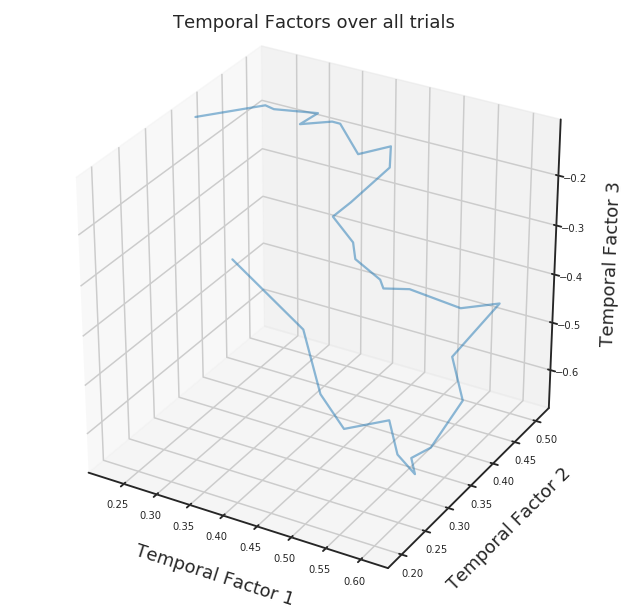

In [39]:
temporal_factors = factors[1]
cm = plt.get_cmap('winter')
fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(111, projection="3d")
p1 = temporal_factors[:,0]
p2 = temporal_factors[:,1]
p3 = temporal_factors[:,2]
ax.plot(p1, p2, p3, alpha=0.5)
ax.set_xlabel('\n\nTemporal Factor 1')
ax.set_ylabel('\n\nTemporal Factor 2')
ax.set_zlabel('\n\nTemporal Factor 3')
plt.tick_params(labelsize=10)
plt.title("Temporal Factors over all trials\n")
plt.show()